In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#dataset load
drebin_all = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', 
                         usecols= [*range(0, 6),*range(7, 13),*range(14,19)
                                  ,21,23,24,*range(28,38),41,43,46,48,51,54,
                                   57,58,59,62,64,68,70,78,80,*range(83,87),
                                   *range(92, 95),98,101,102,104,109,123,128,
                                   140,142,145,147,148,152,155,156,158,167,
                                   171,172,180,190,215])

/home/galib/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drebin_all.info()
X = drebin_all.iloc[0:,0:73]  #independent columns
y = drebin_all.iloc[0:,-1]
X["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [5]:
y = y.map(dict(S=1, B=0))

In [6]:
y[1]

1

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [19]:
#mandatory import 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import RFE

In [38]:
pre = []
rec = []
fs = []
acc = []
def clear_metrics(): 
    pre.clear()
    rec.clear()
    fs.clear()
    acc.clear()

In [50]:

def allscore(y_pred, y_test,i):
    acc.insert(i,accuracy_score(y_test,y_pred))
    fs.insert(i,f1_score(y_test,y_pred))
    pre.insert(i,precision_score(y_test,y_pred))
    rec.insert(i,recall_score(y_test,y_pred))
def run_randomForest(X_train, X_test, y_train, y_test,i=0):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Classification Report for Random Forest: ')
    print(classification_report(y_test,y_pred, digits=4,output_dict=False))
    allscore(y_pred,y_test,i)
def incremental_plot(i,j,title, x_axis = "Number of Features"): 
    from pylab import rcParams
    %matplotlib inline 
    rcParams['figure.figsize'] = 10,8
    sns.set_style('whitegrid')
    x = range(i,j)
    y1 = pre
    y2 = rec
    y3 = acc
    y4 = fs

    fig = plt.figure()
    ax = plt.subplot(111)
    #savefig('f.png', bbox_inches='tight')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel("Performance Metrics")
    ax.plot(x,y1, marker = 'v', mew = 1, label='Precision') #mew = marker width
    ax.plot(x,y2, marker = '^', mew = 1, label='Recall') #mew = marker width
    ax.plot(x,y3, marker = 'o', mew = 1, label='Accuracy') #mew = marker width
    ax.plot(x,y4, marker = 's', mew = 1, label='F-1 Score') #mew = marker width
    ax.legend(loc='upper center', bbox_to_anchor=(1.12, 0.6), shadow=True, prop={'size': 15}, ncol=1)
    #plt.plot(x1,y1, marker = '+', mew = 10)
    plt.savefig(title + '.png', bbox_inches='tight', pad_inches=.1)
    

## Feature Importance (feature_importances_)

In [ ]:
#best ForestClassifier Parameter for feature importances 
clear_metrics()
for index in range(1, 72):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns
                                 
                                 
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe_optimal = sel.transform(X_train)
    X_test_rfe_optimal = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe_optimal, X_test_rfe_optimal, y_train, y_test, index)
    print()

In [41]:
#best RFE(RandomForestClassifier) features
clear_metrics()
for index in range(1, 36):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_optimal = sel.transform(X_train)
    X_test_optimal = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_optimal, X_test_optimal, y_train, y_test, index)

Selected Feature:  1
Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0     0.9622    0.6423    0.7703      1940
           1     0.5949    0.9541    0.7328      1068

    accuracy                         0.7530      3008
   macro avg     0.7785    0.7982    0.7516      3008
weighted avg     0.8318    0.7530    0.7570      3008

Selected Feature:  2
Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0     0.7485    0.9943    0.8541      1940
           1     0.9745    0.3933    0.5604      1068

    accuracy                         0.7809      3008
   macro avg     0.8615    0.6938    0.7072      3008
weighted avg     0.8288    0.7809    0.7498      3008



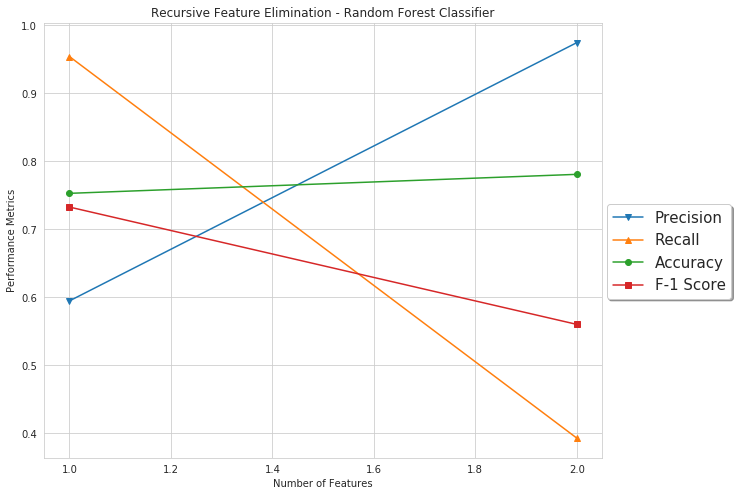

In [54]:
incremental_plot(1,36,"Recursive Feature Elimination using Random Forest Classifier")

In [ ]:
#best RFE(RandomForestClassifier) features
clear_metrics()
for index in range(1, 36):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_optimal = sel.transform(X_train)
    X_test_optimal = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_optimal, X_test_optimal, y_train, y_test, index)

In [ ]:
#best RFE(radient BoostingClassifier) features
clear_metrics()
for index in range(1, 36):
    sel = RFE(RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_optimal = sel.transform(X_train)
    X_test_optimal = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_optimal, X_test_optimal, y_train, y_test, index)